In [ ]:
import re #regular expression specifies a set of strings that matches it(the functions in this module let us check if a particular string matches a given regular expression)
import string #Utility function in this string module split the specified string into words using str.split().
import pandas as pd #this  library  provides ready to use high-performance data structures and data analysis tools.
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
%matplotlib inline 
from plotly import graph_objs as go 

import plotly.express as px
import collections 

import nltk
from nltk.corpus import stopwords

import nltk
import gensim

import warnings
warnings.filterwarnings("ignore")
nltk.download('vader_lexicon')

######## VADER #####
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covaxin_tweets.csv', engine='python')
df

,User,Tagged_User,Relationship,Relationship Date (UTC),Tweet,Tweet Date (UTC),Imported ID
0,waseemuk,faheemyounus,Mentions,01-04-2021 00:16,RT @FaheemYounus: Available Vaccine Options: \...,01-04-2021 00:16,1.377410e+18
1,sitahyderabadi,donitajose,Mentions,01-04-2021 00:30,RT @DonitaJose: It is quite absurd that despit...,01-04-2021 00:30,1.377420e+18
2,xhertx,indianexpress,Mentions,01-04-2021 00:56,RT @IndianExpress: Bharat Biotech has an agree...,01-04-2021 00:56,1.377420e+18
3,artisharma001,swamy39,Mentions,01-04-2021 00:58,RT @Dharma2X: Dr. @Swamy39 jee :\n\n�Covaxin h...,01-04-2021 00:58,1.377430e+18
4,artisharma001,dharma2x,Mentions,01-04-2021 00:58,RT @Dharma2X: Dr. @Swamy39 jee :\n\n�Covaxin h...,01-04-2021 00:58,1.377430e+18
...,...,...,...,...,...,...,...
1796,plugintwter,toiindianews,Mentions,01-04-2021 08:16,"RT @TOIIndiaNews: Covishield, Covaxin effectiv...",01-04-2021 08:16,1.377540e+18
1797,samar11,samar11,Tweet,01-04-2021 02:10,"After inspecting manufacturing facilities, Bra...",01-04-2021 02:10,1.377440e+18
1798,ikaveri,samar11,Mentions,01-04-2021 08:18,RT @samar11: After inspecting manufacturing fa...,01-04-2021 08:18,1.377540e+18
1799,shivani448,toiindianews,Mentions,01-04-2021 08:16,"RT @TOIIndiaNews: Covishield, Covaxin effectiv...",01-04-2021 08:16,1.377540e+18


In [ ]:
df = df.drop(['User','Tagged_User','Relationship','Relationship Date (UTC)','Tweet Date (UTC)','Imported ID'], axis=1)


In [ ]:
df.head(5)

,Tweet
0,RT @FaheemYounus: Available Vaccine Options: \...
1,RT @DonitaJose: It is quite absurd that despit...
2,RT @IndianExpress: Bharat Biotech has an agree...
3,RT @Dharma2X: Dr. @Swamy39 jee :\n\n�Covaxin h...
4,RT @Dharma2X: Dr. @Swamy39 jee :\n\n�Covaxin h...


In [ ]:
df.isnull().sum()

Tweet    0
dtype: int64

In [ ]:
df.describe()

,Tweet
count,1801
unique,780
top,RT @samar11: After inspecting manufacturing fa...
freq,44


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1801 non-null   object
dtypes: object(1)
memory usage: 14.2+ KB


In [ ]:
import string
def clean_text(Tweet):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    Tweet = str(Tweet).lower()
    Tweet = re.sub('\[.*?\%]', '', Tweet)
    Tweet = re.sub('@[\w]+','',Tweet)
    Tweet = re.sub('@?[^\w]+',' ',Tweet)
    Tweet = re.sub('^rt ','',Tweet)
    Tweet = re.sub('https?://\S+|www\.\S+', '', Tweet)
    Tweet = re.sub('<.*?%>+', '', Tweet)
    Tweet = re.sub('[%s]' % re.escape(string.punctuation), '', Tweet)
    Tweet = re.sub('\n', '', Tweet)
    Tweet = re.sub('\w*\d\w*', '', Tweet)
    Tweet = re.sub(r"@(\w+)", ' ', Tweet, flags=re.MULTILINE)
    return Tweet

In [ ]:
df['Tweet'] = df['Tweet'].apply(lambda x:clean_text(x))

In [ ]:
df.Tweet.head(10)

0    available vaccine options  newest mrna pfizer ...
1    it is quite absurd that despite bharat biotech...
2    bharat biotech has an agreement to supply  mil...
3    dr jee covaxin has  efficacy bharat biotech ph...
4    dr jee covaxin has  efficacy bharat biotech ph...
5    dr jee covaxin has  efficacy bharat biotech ph...
6    dr jee covaxin has  efficacy bharat biotech ph...
7    two other countries nepal and zimbabwe have ap...
8    two other countries nepal and zimbabwe have ap...
9    big pharma keeps throwing road blocks so they ...
Name: Tweet, dtype: object

In [ ]:
sentiments = []
for count,tweet in enumerate(df.Tweet):
#     print(tweet)
    sentiments.append(vader.polarity_scores(tweet))
    print(count,vader.polarity_scores(tweet))

0 {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.25}
1 {'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'compound': -0.296}
2 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4939}
3 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.5267}
4 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.5267}
5 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.5267}
6 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.5267}
7 {'neg': 0.197, 'neu': 0.574, 'pos': 0.23, 'compound': 0.2023}
8 {'neg': 0.197, 'neu': 0.574, 'pos': 0.23, 'compound': 0.2023}
9 {'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'compound': -0.2263}
10 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
11 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.5267}
12 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.5267}
13 {'neg': 0.197, 'neu': 0.574, 'pos': 0.23, 'compound': 0.2023}
14 {'neg': 0.197, 'neu': 0.574, 'pos': 0.23, 'compound': 0.2023}
15 {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound'

In [ ]:
len(sentiments)

1801

In [ ]:
target = []
for count,sentiment in enumerate(sentiments):
    print(count)
    if sentiment['compound'] >= 0.05: 
        print("Positive")
        target.append('POSITIVE')
    elif sentiment['compound'] <= -0.05 : 
        print("Negative")
        target.append('NEGATIVE')
    else: 
        print("Neutral")
        target.append('NEUTRAL')

0
Positive
1
Negative
2
Positive
3
Positive
4
Positive
5
Positive
6
Positive
7
Positive
8
Positive
9
Negative
10
Neutral
11
Positive
12
Positive
13
Positive
14
Positive
15
Positive
16
Neutral
17
Neutral
18
Negative
19
Negative
20
Negative
21
Negative
22
Positive
23
Negative
24
Negative
25
Negative
26
Negative
27
Negative
28
Negative
29
Negative
30
Negative
31
Neutral
32
Neutral
33
Negative
34
Negative
35
Positive
36
Positive
37
Neutral
38
Positive
39
Neutral
40
Negative
41
Positive
42
Positive
43
Neutral
44
Neutral
45
Negative
46
Negative
47
Negative
48
Negative
49
Neutral
50
Negative
51
Negative
52
Negative
53
Negative
54
Negative
55
Negative
56
Neutral
57
Negative
58
Neutral
59
Neutral
60
Neutral
61
Negative
62
Negative
63
Negative
64
Negative
65
Neutral
66
Positive
67
Positive
68
Neutral
69
Negative
70
Negative
71
Negative
72
Neutral
73
Neutral
74
Neutral
75
Neutral
76
Neutral
77
Neutral
78
Positive
79
Positive
80
Positive
81
Neutral
82
Neutral
83
Neutral
84
Neutral
85
Neutral
86
Ne

In [ ]:
print(target)

['POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEUTRAL', 'NEUTRAL', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEUTRAL', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEUTRAL', 'NEGATIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUT

In [ ]:
target = pd.DataFrame(target, columns=['target'])
target

,target
0,POSITIVE
1,NEGATIVE
2,POSITIVE
3,POSITIVE
4,POSITIVE
...,...
1796,POSITIVE
1797,NEGATIVE
1798,NEGATIVE
1799,POSITIVE


In [ ]:
df = pd.concat([df, target], axis = 1)

In [ ]:
#Data Visualization
temp = df.groupby('target').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,target,Tweet
1,NEUTRAL,998
2,POSITIVE,474
0,NEGATIVE,329


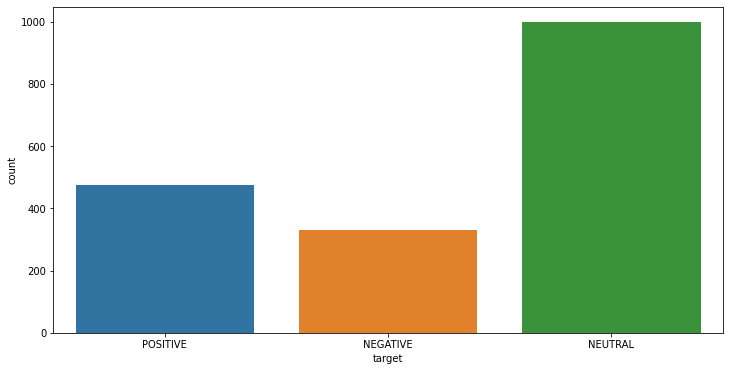

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='target',data=df)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize


In [ ]:
fig = go.Figure(go.Funnelarea(
    text = temp.target,
    values = temp.Tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
split_words = []
top = []
for tweet in df.Tweet:
    top.append(tweet)
top = str(top)
tweet = str(df.Tweet)

In [ ]:
top

"['available vaccine options  newest mrna pfizer and moderna  modern vector az sputnik jj  conventional ', 'it is quite absurd that despite bharat biotech being in the state telangana has no stocks for it hospitals note many have ', 'bharat biotech has an agreement to supply  million doses of covaxin to the brazilian government https t co  ', 'dr jee covaxin has  efficacy bharat biotech phase  trial results hearty congrats to bharat biotech m ', 'dr jee covaxin has  efficacy bharat biotech phase  trial results hearty congrats to bharat biotech m ', 'dr jee covaxin has  efficacy bharat biotech phase  trial results hearty congrats to bharat biotech m ', 'dr jee covaxin has  efficacy bharat biotech phase  trial results hearty congrats to bharat biotech m ', 'two other countries nepal and zimbabwe have approved covaxin for emergency use no covaxin is approved in iran a ', 'two other countries nepal and zimbabwe have approved covaxin for emergency use no covaxin is approved in iran a ', 'bi

In [ ]:
wordcount = {}
for word in tweet.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    word = word.replace("rt","")
    word = word.replace("","")
    if word not in stop_words:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

,Word,Count
0,covaxin,5
1,bharat,4
2,biotech,4
3,covishield,3
4,,2
5,dr,2
6,jee,2
7,efficacy,2
8,ph,2
9,effective,2


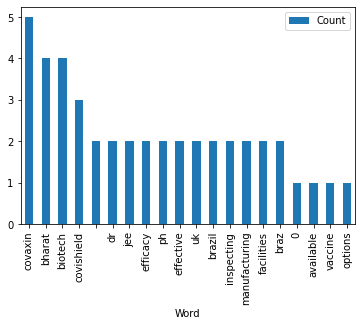

In [ ]:
word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(20)
temp = pd.DataFrame(lst, columns = ['Word', 'Count'])
temp.plot.bar(x='Word',y='Count')
temp.columns = ['Word','Count']
temp.style.background_gradient(cmap='Purples')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        # stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

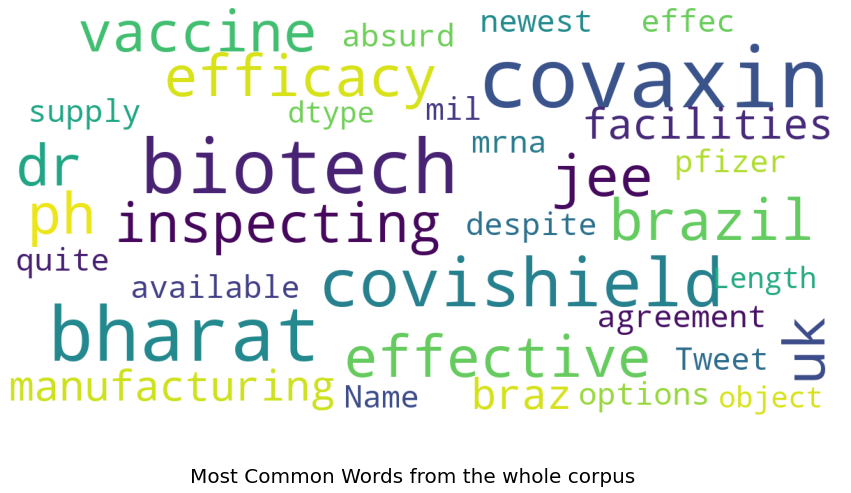

In [ ]:
show_wordcloud(df['Tweet'],'Most Common Words from the whole corpus')

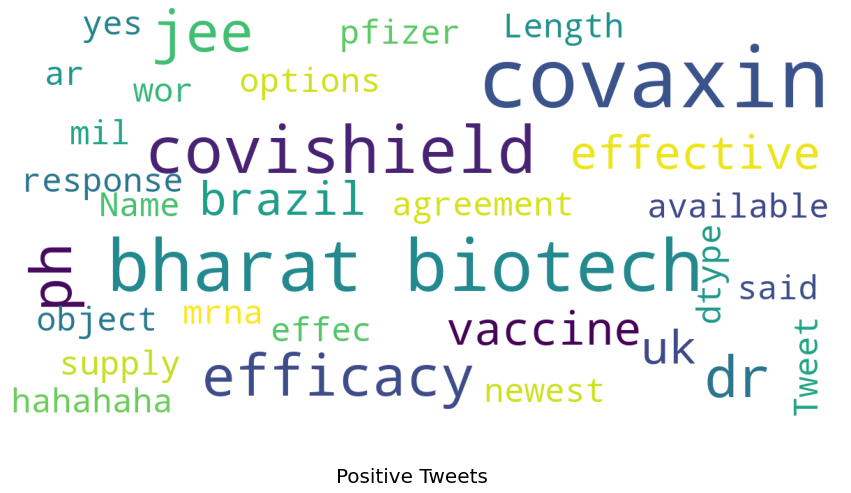

In [ ]:
show_wordcloud(df[df['target'] == 'POSITIVE']['Tweet'],'Positive Tweets')

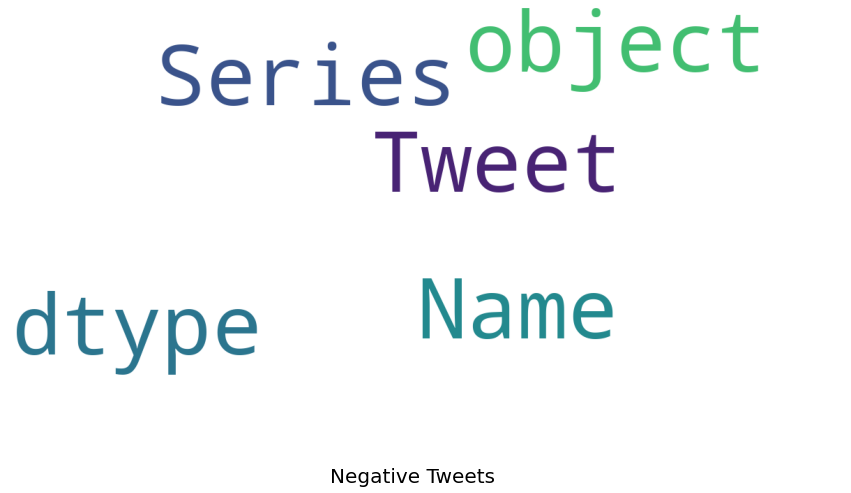

In [ ]:
show_wordcloud(df[df['target'] == 'Negative']['Tweet'], 'Negative Tweets')

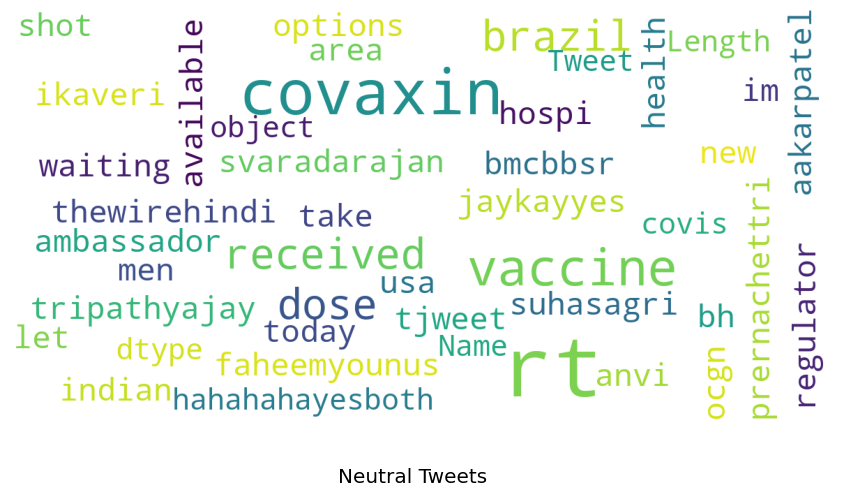

In [ ]:
show_wordcloud(df[df['target'] == 'NEUTRAL']['Tweet'],'Neutral Tweets')

In [ ]:
my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'a',' a ',' a','a ''below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
df['Text_new'] = df['Tweet'].apply(lambda x:' '.join([word for word in x.split() if word not in  (my_stopwords)]))

In [ ]:
df.Tweet.count()

1801

In [ ]:
df.Text_new.count()

1801

In [ ]:
df.head(10)

,Tweet,target,Text_new
0,available vaccine options newest mrna pfizer ...,POSITIVE,available vaccine options newest mrna pfizer m...
1,it is quite absurd that despite bharat biotech...,NEGATIVE,quite absurd despite bharat biotech state tela...
2,bharat biotech has an agreement to supply mil...,POSITIVE,bharat biotech agreement supply million doses ...
3,dr jee covaxin has efficacy bharat biotech ph...,POSITIVE,dr jee covaxin efficacy bharat biotech phase t...
4,dr jee covaxin has efficacy bharat biotech ph...,POSITIVE,dr jee covaxin efficacy bharat biotech phase t...
5,dr jee covaxin has efficacy bharat biotech ph...,POSITIVE,dr jee covaxin efficacy bharat biotech phase t...
6,dr jee covaxin has efficacy bharat biotech ph...,POSITIVE,dr jee covaxin efficacy bharat biotech phase t...
7,two other countries nepal and zimbabwe have ap...,POSITIVE,two countries nepal zimbabwe approved covaxin ...
8,two other countries nepal and zimbabwe have ap...,POSITIVE,two countries nepal zimbabwe approved covaxin ...
9,big pharma keeps throwing road blocks so they ...,NEGATIVE,big pharma keeps throwing road blocks time sel...


In [ ]:
fig = px.bar(temp, x="Word", y="Count", title='Commmon Words in Selected Text', orientation='v', 
             width=700, height=700,color='Count')
fig.show()


In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)
                                   

In [ ]:
%%time
documents = [_text.split() for _text in df.Text_new] 

CPU times: user 1.77 ms, sys: 1.91 ms, total: 3.68 ms
Wall time: 3.52 ms


In [ ]:
w2v_model.build_vocab(documents)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 284
